In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

## Implementar el filtrado óptimo Wiener con descenso por gradiente en la plantilla steepest_descent.py. Prestar atención al formato de salida:

In [30]:
def steepest_descent(R, p, w0, mu, N):
    """Implementa el filtrado óptimo Wiener con descenso por gradiente.

    Argumentos:
        R: matriz de autocorrelación
        p: matriz de correlación cruzada
        w0: valor inicial de los coeficientes del filtro
        mu: tamaño de paso
        N: número máximo de iteraciones

    Devuelve:
        Una matriz de tipo np.array en cuyas filas están
        los coeficientes w para cada paso.
    """
    Wt = np.zeros((N, len(w0)))
    w_n = w0
    for i in range(N):
        # w(n+1) = w(n) - 0.5*mu*delta_J(w)
        delta_J = p-np.dot(R,w_n)
        w_aux = w_n + mu*delta_J
        Wt[i] = np.flip(w_aux)
        w_n = w_aux
    return Wt

## Probar la función con los argumentos dados:

In [31]:
R = np.array([[2, 1],
             [1, 2]])
p = np.array([6,4])
w0 = np.array([0,0])
mu = 0.1
N = 1000
Wt = steepest_descent(R, p, w0, mu, N)

In [32]:
w_1 = Wt[:,0]
w_2 = Wt[:,1]

In [33]:
Wt[-1]

array([0.66666667, 2.66666667])

### Representar los coeficientes w1 y w2 en función del tiempo:

#### Representar como referencia la solución del filtro óptimo Wiener correspondiente.

In [34]:
def wiener_coefs(R, p):
    r_inv = inv(R)
    p_m = np.flip(p)
    w_o = np.dot(r_inv, p_m)
    return w_o

In [35]:
w_o = wiener_coefs(R, p)
print(w_o)

[0.66666667 2.66666667]


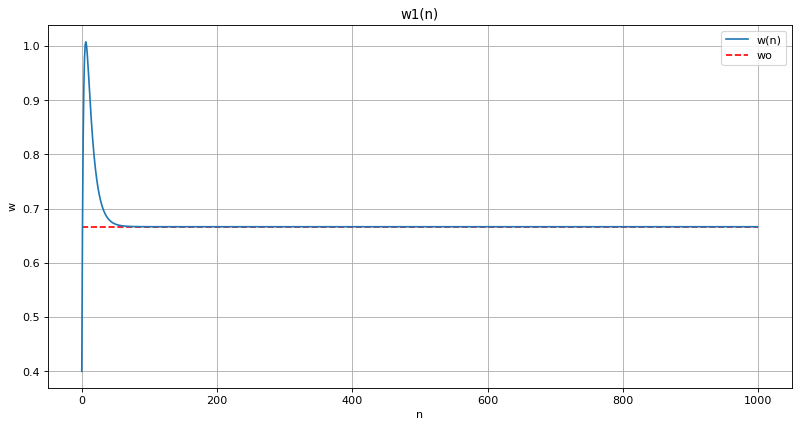

In [38]:
plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w')
plt.xlabel('n')
plt.title('w1(n)')
plt.grid('on')
plt.plot(w_1, label='w(n)')
plt.hlines(w_o[0], 0, N, colors='r', linestyles='dashed', label='wo')
plt.legend()
plt.show()

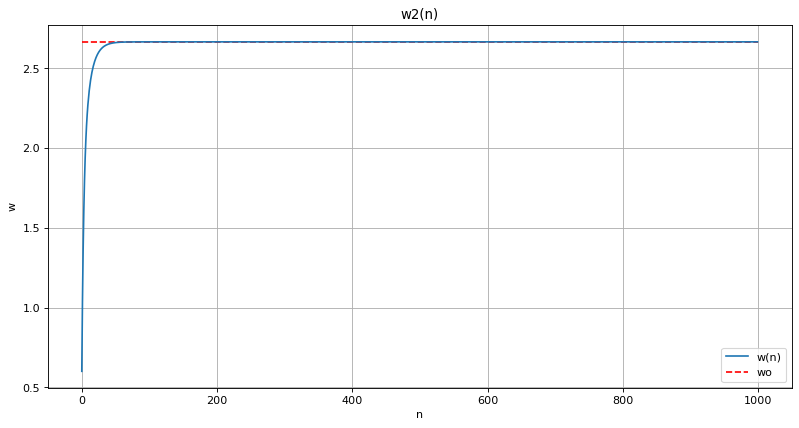

In [39]:
plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w')
plt.xlabel('n')
plt.title('w2(n)')
plt.grid('on')
plt.plot(w_2, label='w(n)')
plt.hlines(w_o[1], 0, N, colors='r', linestyles='dashed', label='wo')
plt.legend()
plt.show()

## Representar la curva de error J(w):

In [46]:
def get_J(w, desv, p, R):
    J_w = []
    for i in range(len(w)):
        w_dot_p = np.dot(w[i], p)
        w_dot_R = np.dot(w[i],R)
        J_aux = desv-2*w_dot_p+np.dot(w_dot_R,w[i])
        J_w.append(J_aux)
    return J_w

In [49]:
desv = 20
J_s = get_J(Wt, desv, p, R)

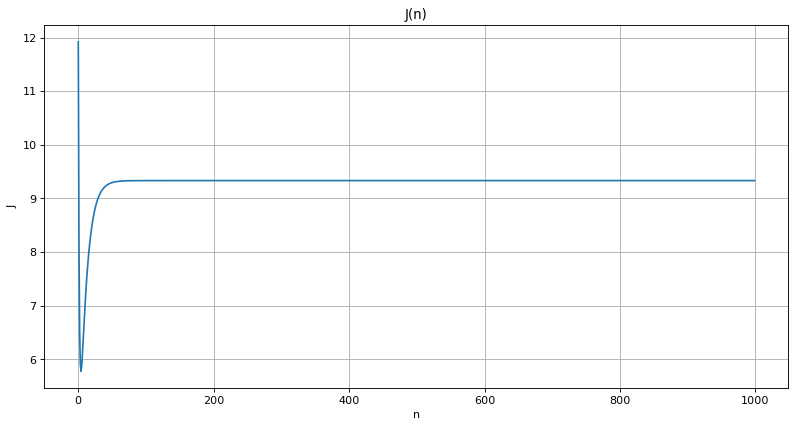

In [51]:
plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J')
plt.xlabel('n')
plt.title('J(n)')
plt.grid('on')
plt.plot(J_s)
plt.show()

## Determinar los autovalores de R, y a partir de ellos determinar µmax. Para un valor de µ cercano a µmax representar la evolución de los coeficientes w(t):

In [52]:
ev, _ = np.linalg.eig(R)
lambda_max = np.amax(ev)
mu_max = 2/lambda_max
print('mu_max: ', mu_max)

mu_max:  0.6666666666666666


In [53]:
delta = 0.01
Wt = steepest_descent(R, p, w0, mu_max-delta, N)

In [54]:
w_1 = Wt[:,0]
w_2 = Wt[:,1]

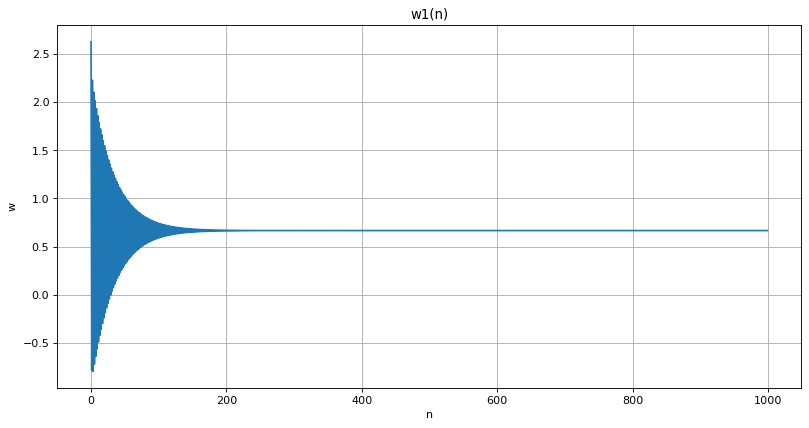

In [55]:
plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w')
plt.xlabel('n')
plt.title('w1(n)')
plt.grid('on')
plt.plot(w_1)
plt.show()

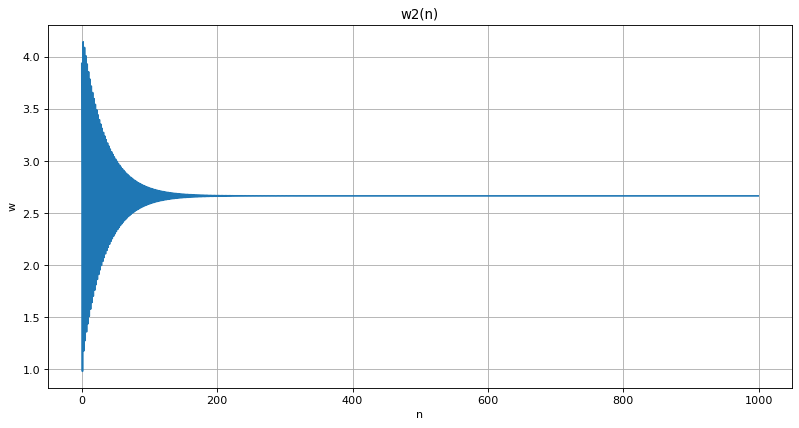

In [56]:
plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w')
plt.xlabel('n')
plt.title('w2(n)')
plt.grid('on')
plt.plot(w_2)
plt.show()

## Considerar el escenario de R y p variables en el tiempo. Explicar los beneficios del descenso por gradiente en comparación con el método de Wiener:

## El archivo steepest_descent_test.py filtra una señal de música d(t) con un filtro Wiener obtenido por descenso por gradiente con diferentes valores de µ. Analizar los gráficos generados. ¿Qué ocurre en el caso $ µ = 10^{-6} $?